In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

In [2]:
from dgs.utils import load_results_from_files
from dgs.plotutils import plot_coded_column as _plot_coded_column
from dgs.utils import count_unique_values, print_groupby

kw_plot = {'scaleToMax': False}
def plot_coded_column(df, name, label=None):
    _plot_coded_column(df, name, label=label, **kw_plot)

## Goals
- Identify degree of adaptivity: raw numbers/types of self-governance mechanisms and parameters, and what kinds of "degrees of freedom" they afford
- Identify degree of autonomy: ability to self-govern (System 5 of Viable System Model)

## Import data and check what's generally in it

In [3]:
dir = 'tmp'

df_objects, df_params = load_results_from_files(dir)

In [4]:
df_objects.head()

,object_name,contract,type,inheritance,modifiers,values,visibility,description,parameters,title,...,repo_update_datetime,repo_version,repo_url,parameters_names,dispute_resolution,election,membership,proposal,reputation,voting
id,,,,,,,,,,,,,,,,,,,,,
ACL.ACL@22,ACL,ACL,ContractDefinition,[Initializable],[],[],NaN,NaN,"[ACL.ACL.ROOT_ROLE@23, ACL.ACL.FREEZE_FLAG@30,...",NaN,...,2020-11-10T13:07:27Z,v1.0.0-beta.12,https://github.com/aragon/govern/tree/v1.0.0-b...,"[ROOT_ROLE, FREEZE_FLAG, ANY_ADDR, UNSET_ROLE,...",0,0,1,0,0,0
ACL.Frozen@40,Frozen,ACL,EventDefinition,[],[],[],NaN,NaN,"[ACL.Frozen.role@40, ACL.Frozen.actor@40]",NaN,...,2020-11-10T13:07:27Z,v1.0.0-beta.12,https://github.com/aragon/govern/tree/v1.0.0-b...,"[role, actor]",0,0,1,0,0,0
ACL.Granted@38,Granted,ACL,EventDefinition,[],[],[],NaN,NaN,"[ACL.Granted.role@38, ACL.Granted.actor@38, AC...",NaN,...,2020-11-10T13:07:27Z,v1.0.0-beta.12,https://github.com/aragon/govern/tree/v1.0.0-b...,"[role, actor, who, oracle]",0,0,1,0,0,0
ACL.Revoked@39,Revoked,ACL,EventDefinition,[],[],[],NaN,NaN,"[ACL.Revoked.role@39, ACL.Revoked.actor@39, AC...",NaN,...,2020-11-10T13:07:27Z,v1.0.0-beta.12,https://github.com/aragon/govern/tree/v1.0.0-b...,"[role, actor, who]",0,0,1,0,0,0
ACL._freeze@122,_freeze,ACL,FunctionDefinition,[],[],[],internal,NaN,[ACL._freeze._role@122],NaN,...,2020-11-10T13:07:27Z,v1.0.0-beta.12,https://github.com/aragon/govern/tree/v1.0.0-b...,[_role],0,0,1,0,0,0


In [5]:
print(df_objects.columns)
print(len(df_objects))

Index(['object_name', 'contract', 'type', 'inheritance', 'modifiers', 'values',
       'visibility', 'description', 'parameters', 'title', 'notice', 'dev',
       'param', 'return', 'full_comment', 'coding_keyword_search',
       'coding_topic_search', 'url', 'project', 'repo_update_datetime',
       'repo_version', 'repo_url', 'parameters_names', 'dispute_resolution',
       'election', 'membership', 'proposal', 'reputation', 'voting'],
      dtype='object')
3516


In [6]:
keyword_counts = count_unique_values(df_objects['coding_keyword_search'])#['coding_keyword_search'])
print(keyword_counts)
KEYWORDS = sorted(list(keyword_counts.index))
print(KEYWORDS)

dispute_resolution    171
election               11
membership            262
proposal              557
reputation            242
voting                424
Name: count, dtype: int64
['dispute_resolution', 'election', 'membership', 'proposal', 'reputation', 'voting']


In [7]:
PROJECTS = list(df_objects['project'].unique())

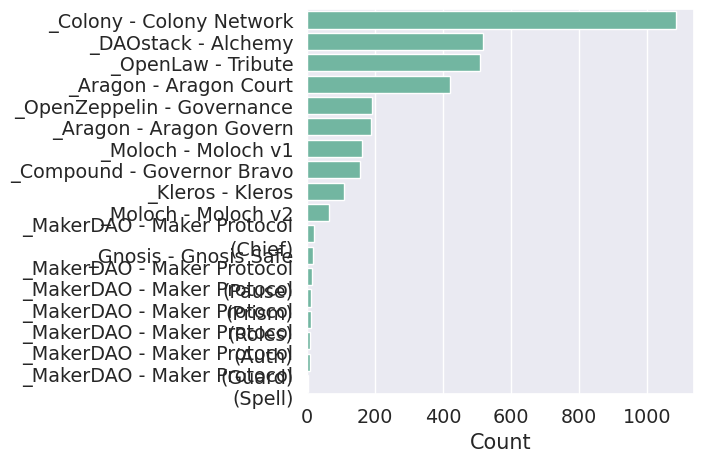

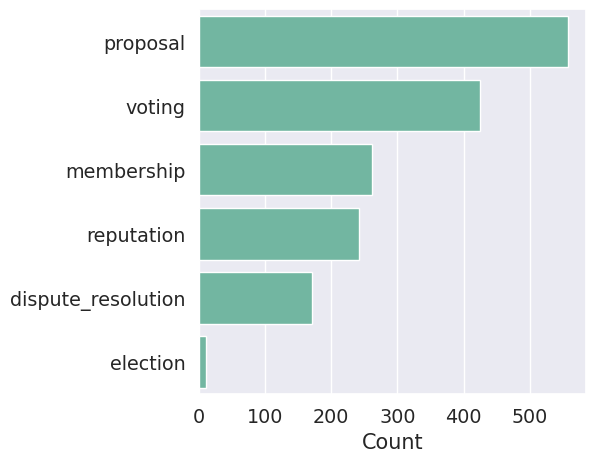

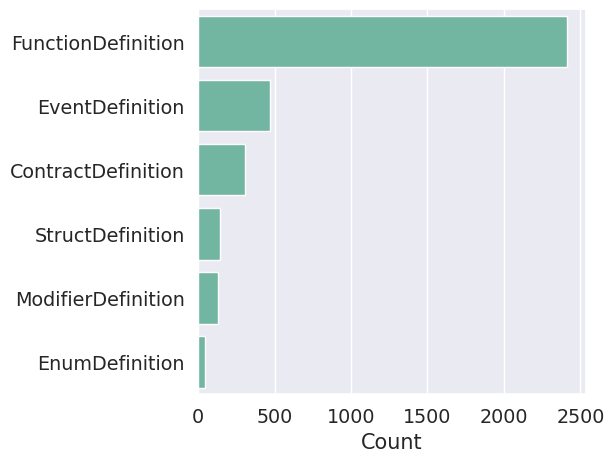

In [8]:
if len(PROJECTS) > 1:
    plot_coded_column(df_objects, 'project')
plot_coded_column(df_objects, 'coding_keyword_search')
plot_coded_column(df_objects, 'type')

In [9]:
print(f"Including data from {len(df_objects['project'].unique())} projects")
print(f"Found {len(df_objects.index)} keyword-coded contract objects and {len(df_params.index)} parameters")
print(f"Keywords include: {', '.join(KEYWORDS)}")

Including data from 18 projects
Found 3516 keyword-coded contract objects and 8174 parameters
Keywords include: dispute_resolution, election, membership, proposal, reputation, voting


In [10]:
df_params.head()

,parameter_name,object_id,contract,type,type_category,initial_value,visibility,description,full_comment,url,project
id,,,,,,,,,,,
DSChiefApprovals.DSChiefApprovals.slates@28,slates,DSChiefApprovals.DSChiefApprovals@27,DSChiefApprovals,mapping (bytes32 => type:ArrayTypeName),map,NaN,public,NaN,NaN,https://github.com/dapphub/ds-chief/blob/maste...,_MakerDAO - Maker Protocol (Chief)
DSChiefApprovals.DSChiefApprovals.votes@29,votes,DSChiefApprovals.DSChiefApprovals@27,DSChiefApprovals,mapping (address => bytes32),map,NaN,public,NaN,NaN,https://github.com/dapphub/ds-chief/blob/maste...,_MakerDAO - Maker Protocol (Chief)
DSChiefApprovals.DSChiefApprovals.approvals@30,approvals,DSChiefApprovals.DSChiefApprovals@27,DSChiefApprovals,mapping (address => uint256),map,NaN,public,NaN,NaN,https://github.com/dapphub/ds-chief/blob/maste...,_MakerDAO - Maker Protocol (Chief)
DSChiefApprovals.DSChiefApprovals.deposits@31,deposits,DSChiefApprovals.DSChiefApprovals@27,DSChiefApprovals,mapping (address => uint256),map,NaN,public,NaN,NaN,https://github.com/dapphub/ds-chief/blob/maste...,_MakerDAO - Maker Protocol (Chief)
DSChiefApprovals.DSChiefApprovals.GOV@32,GOV,DSChiefApprovals.DSChiefApprovals@27,DSChiefApprovals,DSToken,userdefined,NaN,public,voting token that gets locked up,voting token that gets locked up,https://github.com/dapphub/ds-chief/blob/maste...,_MakerDAO - Maker Protocol (Chief)


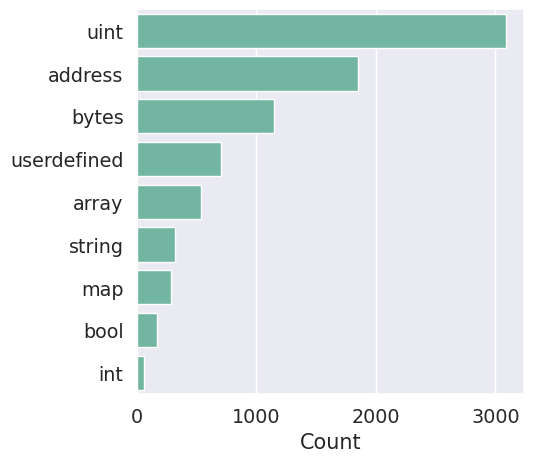

In [11]:
#plot_coded_column(df_params, 'project')
#plot_coded_column(df_params, 'coding_keyword_search_from_object')
plot_coded_column(df_params, 'type_category')

## By object type

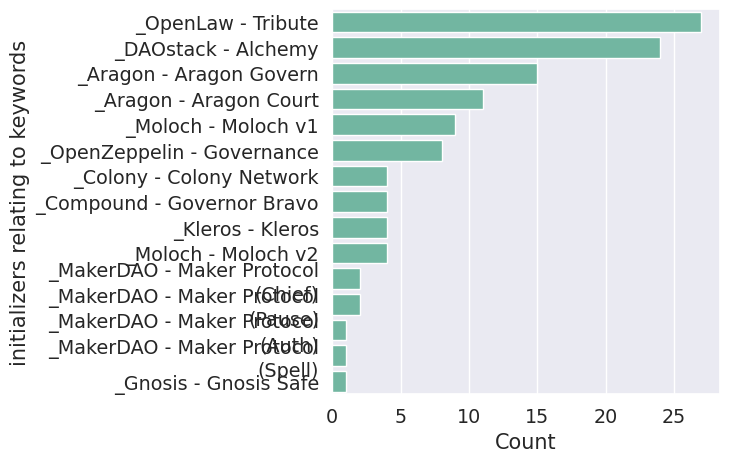

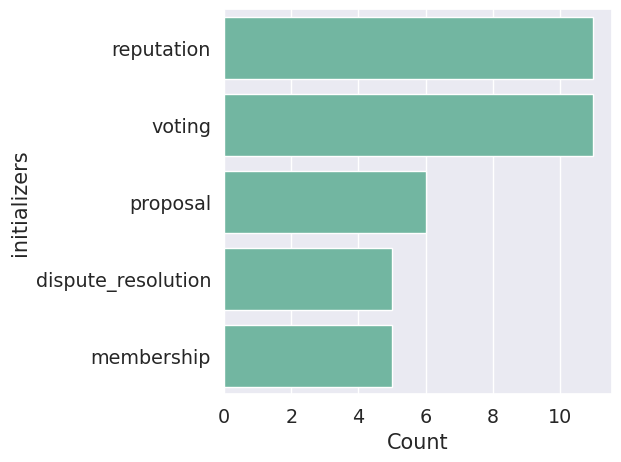

In [12]:
df_init = df_objects[df_objects['object_name'].isin(['constructor', 'initialize'])]
if len(PROJECTS) > 1:
    plot_coded_column(df_init, 'project', label='initializers relating to keywords')
plot_coded_column(df_init, 'coding_keyword_search', label='initializers')

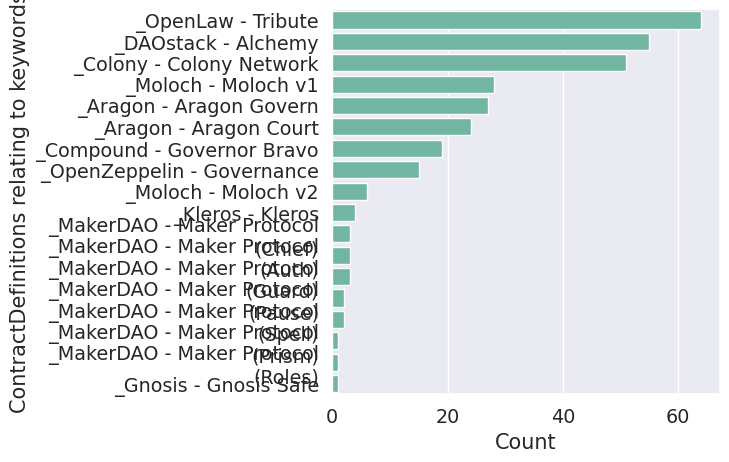

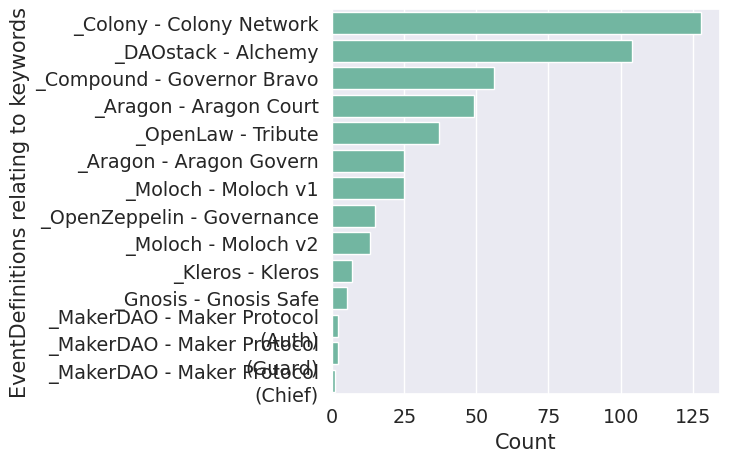

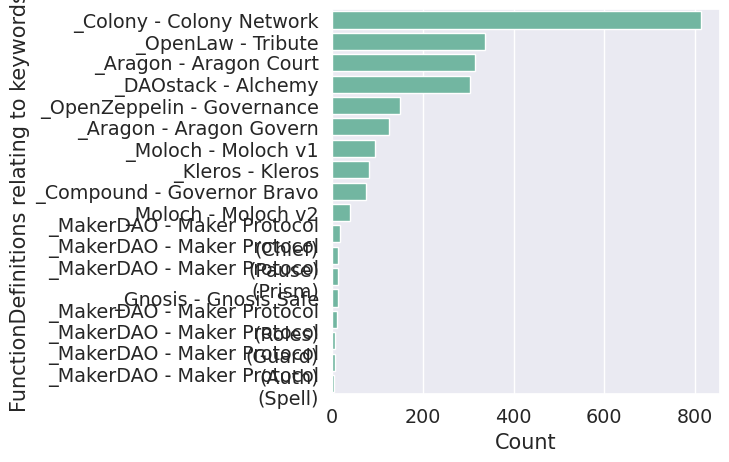

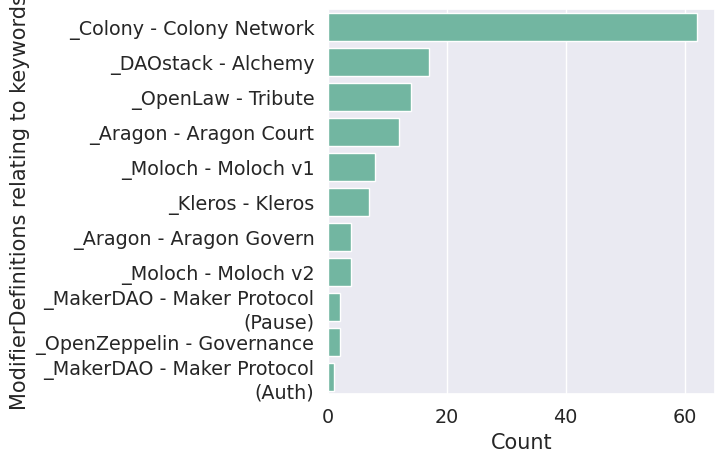

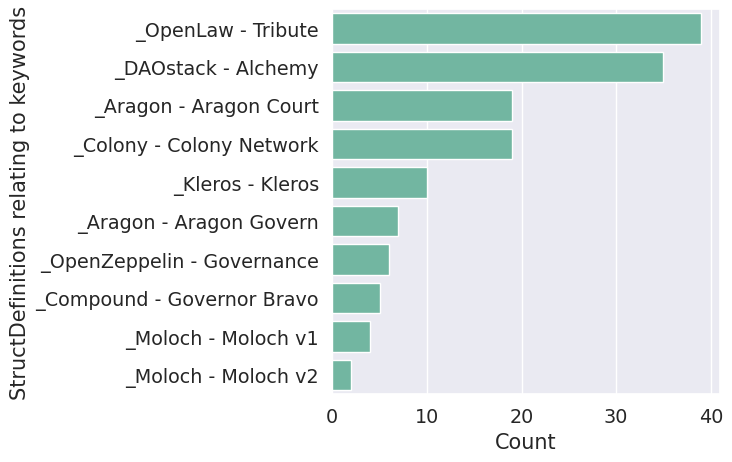

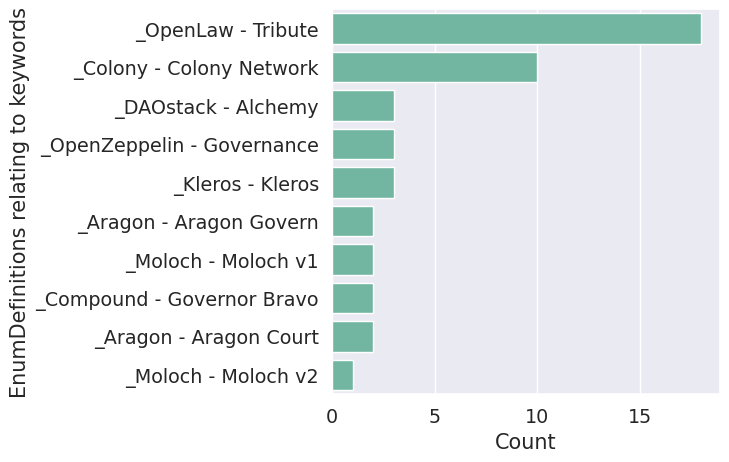

In [13]:
dfs_by_type = {
    t: df_objects[df_objects['type'] == t] for t in df_objects.type.unique()
}

if len(PROJECTS) > 1:
    for t, df in dfs_by_type.items():
        plot_coded_column(df, 'project', label=f'{t}s relating to keywords')


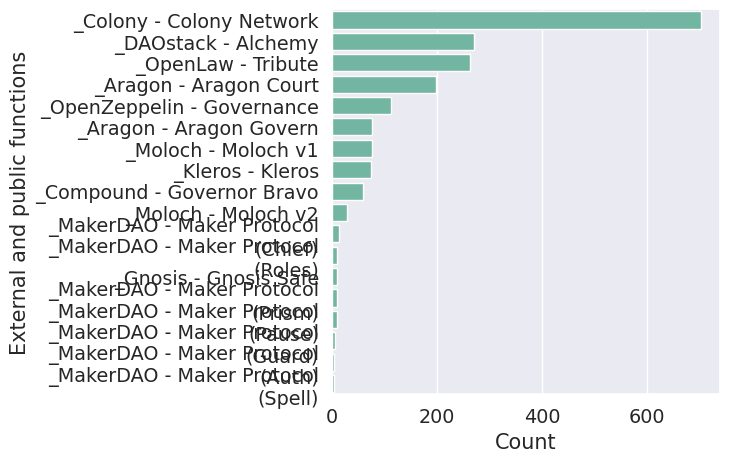

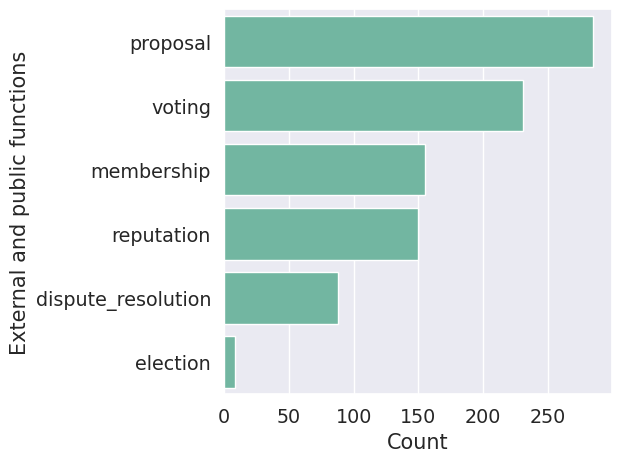

In [14]:
df_functions = dfs_by_type['FunctionDefinition']
df_ext_funcs = df_functions[df_functions['visibility'].isin(['external', 'public'])]
if len(PROJECTS) > 1:
    plot_coded_column(df_ext_funcs, 'project', label='External and public functions')
plot_coded_column(df_ext_funcs, 'coding_keyword_search', label='External and public functions')

In [15]:
# Configurable parameters at initialization of governance smart contracts
df_init.sort_values(by='project', inplace=True)
for i, row in df_init.iterrows():
    params = row['parameters']
    print(f"{row['project']}, {row['contract']}:")
    if isinstance(params, list):
        parameterNames = [df_params.loc[ref, 'parameter_name'] for ref in params]
        if all(isinstance(param, str) for param in parameterNames):
            # Workaround for bug where parameter name IDs may be non-unique
            print("\t" + "\n\t".join(parameterNames) + "\n")
    else:
        print("\tNone\n")

_Aragon - Aragon Court, DisputeManager:
	_controller
	_maxJurorsPerDraftBatch
	_skippedDisputes

_Aragon - Aragon Court, AragonCourt:
	_termParams
	_governors
	_feeToken
	_fees
	_roundStateDurations
	_pcts
	_roundParams
	_appealCollateralParams
	_minActiveBalance

_Aragon - Aragon Court, CourtTreasury:
	_controller

_Aragon - Aragon Court, CourtSubscriptions:
	_controller
	_periodDuration
	_feeToken
	_feeAmount
	_prePaymentPeriods
	_resumePrePaidPeriods
	_latePaymentPenaltyPct
	_governorSharePct

_Aragon - Aragon Court, JurorsRegistry:
	_controller
	_jurorToken
	_totalActiveBalanceLimit

_Aragon - Aragon Court, CourtConfig:
	_feeToken
	_fees
	_roundStateDurations
	_pcts
	_roundParams
	_appealCollateralParams
	_minActiveBalance

_Aragon - Aragon Court, CourtClock:
	_termParams

_Aragon - Aragon Court, CRVoting:
	_controller

_Aragon - Aragon Court, Controller:
	_termParams
	_governors
	_feeToken
	_fees
	_roundStateDurations
	_pcts
	_roundParams
	_appealCollateralParams
	_minActiveBalanc

/tmp/ipykernel_97116/3127110893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_init.sort_values(by='project', inplace=True)
/tmp/ipykernel_97116/3127110893.py:3: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  for i, row in df_init.iterrows():


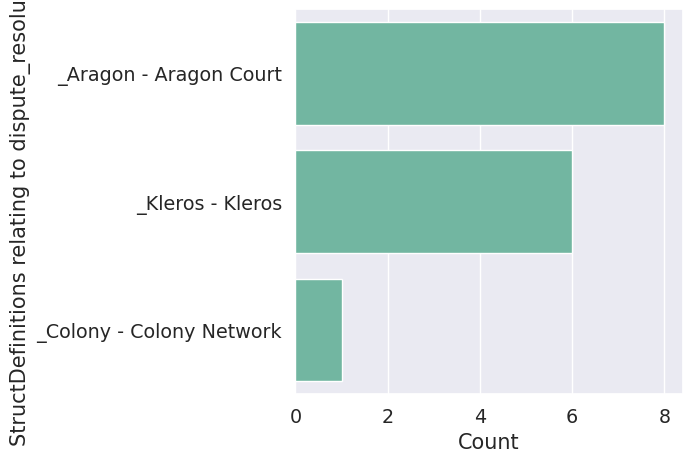

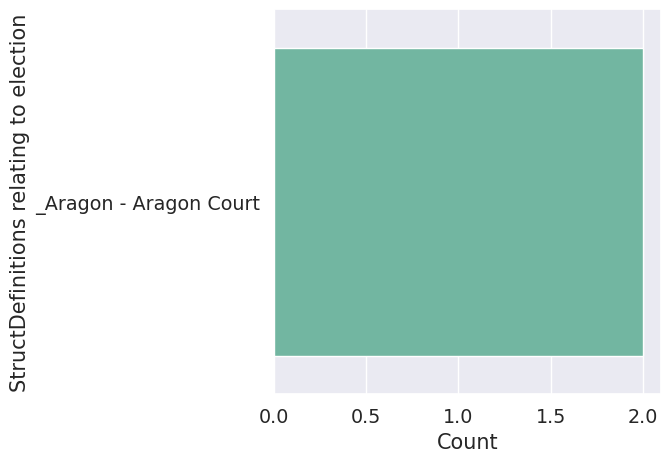

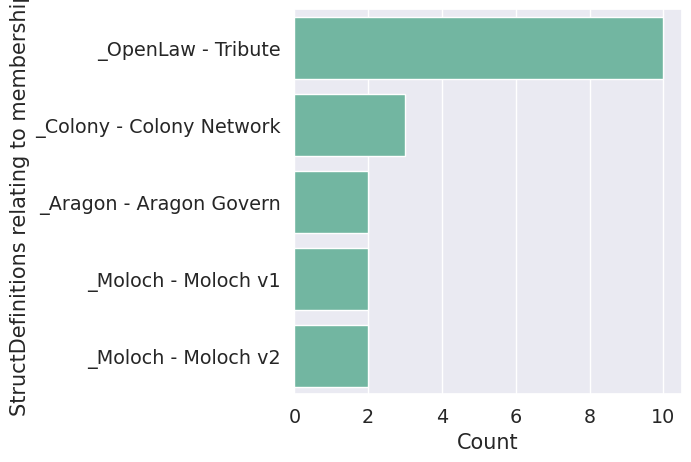

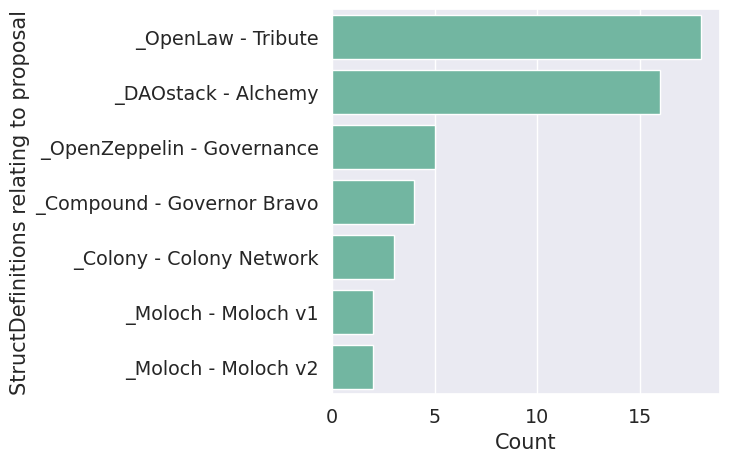

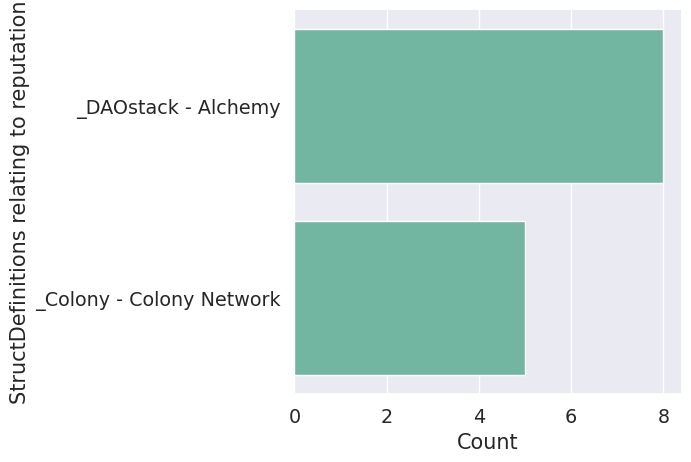

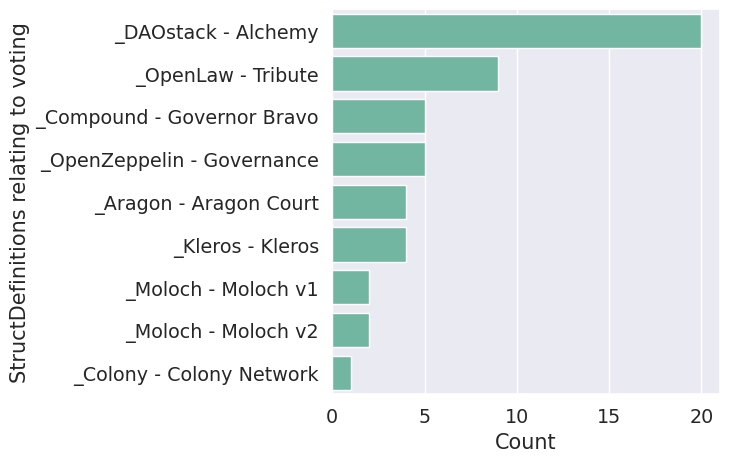

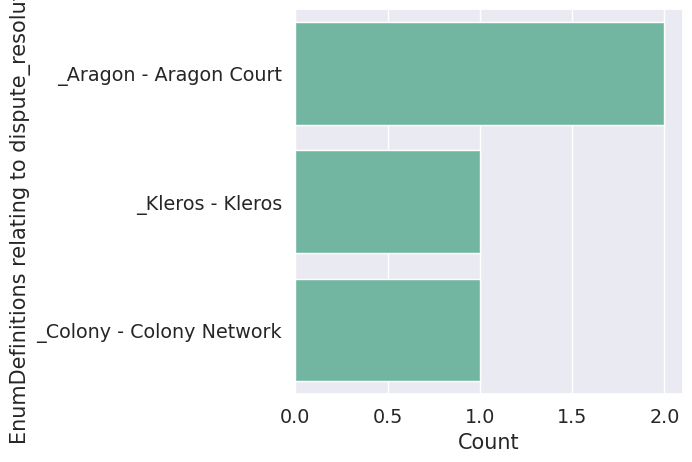

<Figure size 500x500 with 0 Axes>

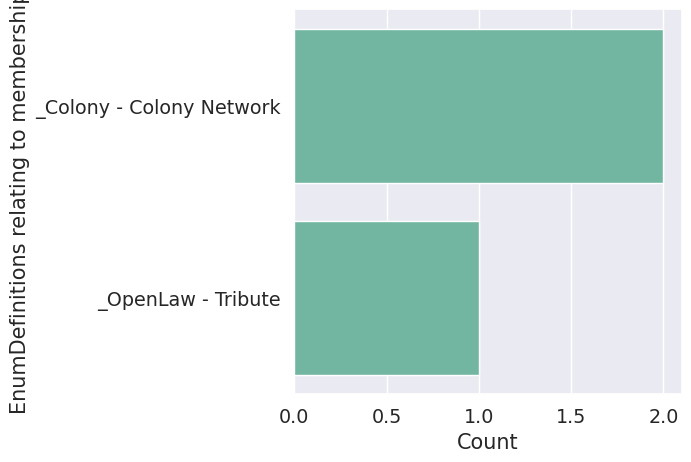

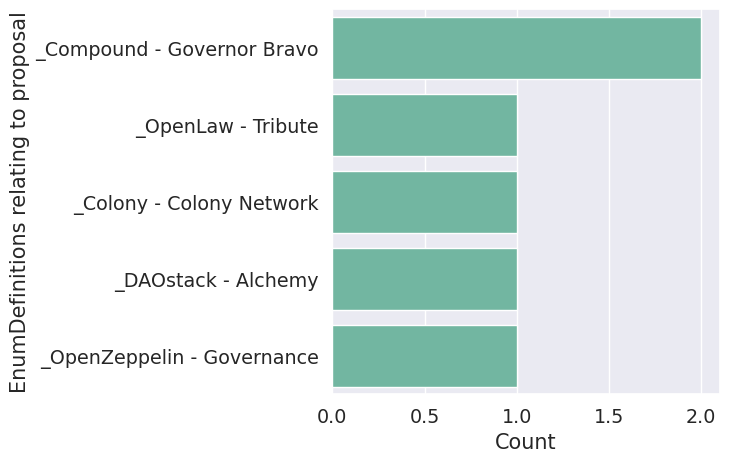

<Figure size 500x500 with 0 Axes>

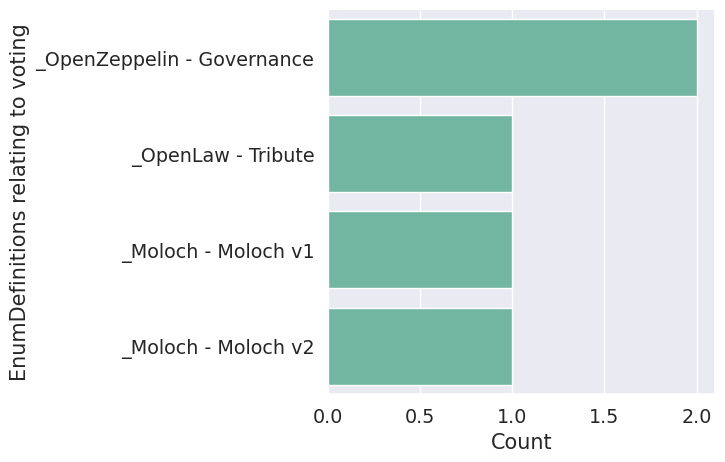

In [16]:
if len(PROJECTS) > 1:
    for t, df in dfs_by_type.items():
        if t in ['StructDefinition', 'EnumDefinition']:
            for kw in KEYWORDS:
                try:
                    plot_coded_column(df[df[kw] == 1], 'project', label=f'{t}s relating to {kw}')
                except ValueError:
                    pass # None found

In [17]:
# How many parameters does it take to define an individual proposal? (Or in some cases, the proposal generation process overall?)
df_tmp = dfs_by_type['StructDefinition']
for kw in ['proposal']:
    try:
        df_kw = df_tmp[df_tmp[kw] == 1]
        df_kw['parameter_count'] = df_kw['parameters'].apply(len)
        gb_kw = df_kw[['project', 'contract', 'object_name', 'parameter_count']].groupby(by='project')
        print_groupby(gb_kw)
    except ValueError:
        pass # None found

_Colony - Colony Network
                                                                  project  \
id                                                                          
FundingQueue.Proposal@52                         _Colony - Colony Network   
ReputationMiningCycleDataTypes.DisputedEntry@39  _Colony - Colony Network   
ReputationMiningCycleDataTypes.Submission@32     _Colony - Colony Network   

                                                                       contract  \
id                                                                                
FundingQueue.Proposal@52                                           FundingQueue   
ReputationMiningCycleDataTypes.DisputedEntry@39  ReputationMiningCycleDataTypes   
ReputationMiningCycleDataTypes.Submission@32     ReputationMiningCycleDataTypes   

                                                   object_name  \
id                                                               
FundingQueue.Proposal@52                 

/tmp/ipykernel_97116/3355254069.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kw['parameter_count'] = df_kw['parameters'].apply(len)


In [18]:
# How many states can a proposal be in?
df_tmp = dfs_by_type['EnumDefinition']
for kw in ['proposal']:
    try:
        df_kw = df_tmp[df_tmp[kw] == 1]
        df_kw['parameter_count'] = df_kw['values'].apply(len)
        gb_kw = df_kw[['project', 'contract', 'object_name', 'parameter_count']].groupby(by='project')
        print_groupby(gb_kw)
    except ValueError:
        pass # None found

_Colony - Colony Network
                                                project      contract  \
id                                                                      
FundingQueue.ProposalState@50  _Colony - Colony Network  FundingQueue   

                                 object_name  parameter_count  
id                                                             
FundingQueue.ProposalState@50  ProposalState                4   

_Compound - Governor Bravo
                                                                     project  \
id                                                                             
GovernorBravoDelegateStorageV1.ProposalState@153  _Compound - Governor Bravo   
GovernorBravoDelegateStorageV1.ProposalState@159  _Compound - Governor Bravo   

                                                                        contract  \
id                                                                                 
GovernorBravoDelegateStorageV1.ProposalState@

/tmp/ipykernel_97116/3706757327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kw['parameter_count'] = df_kw['values'].apply(len)


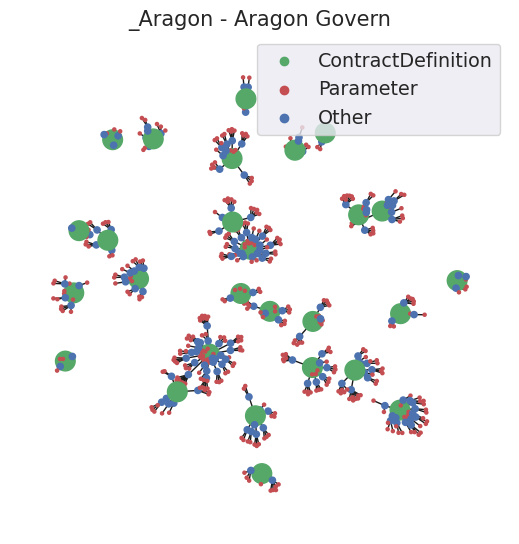

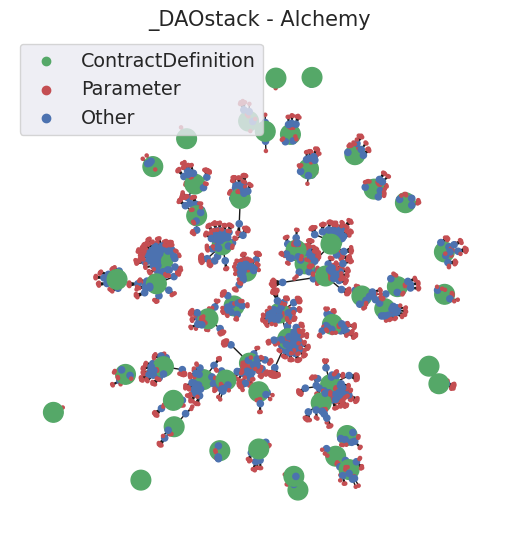

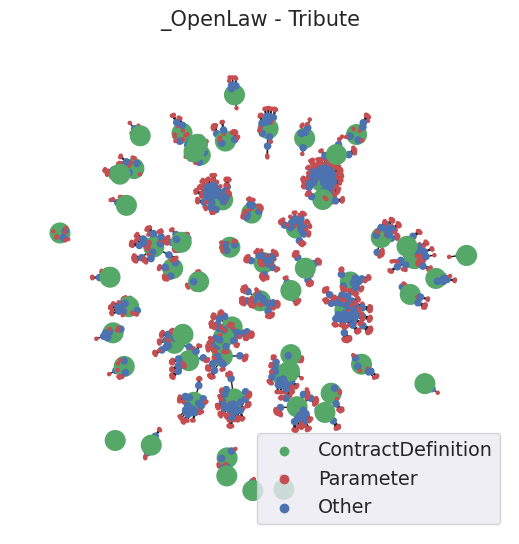

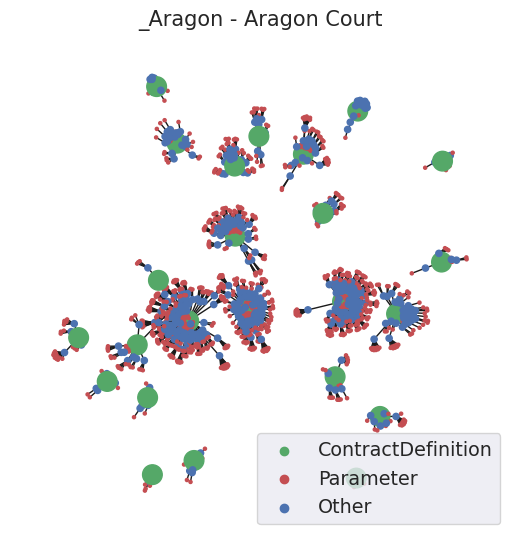

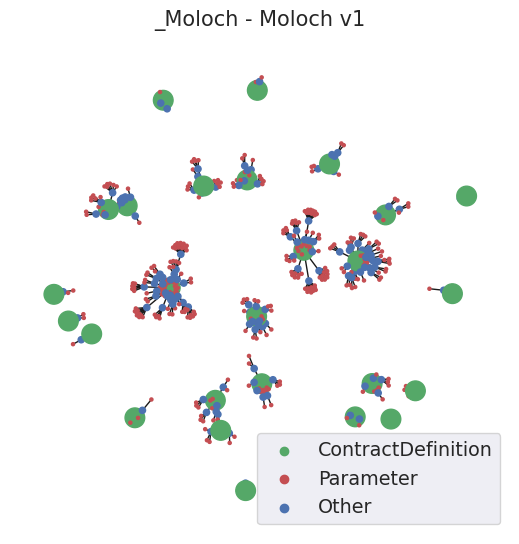

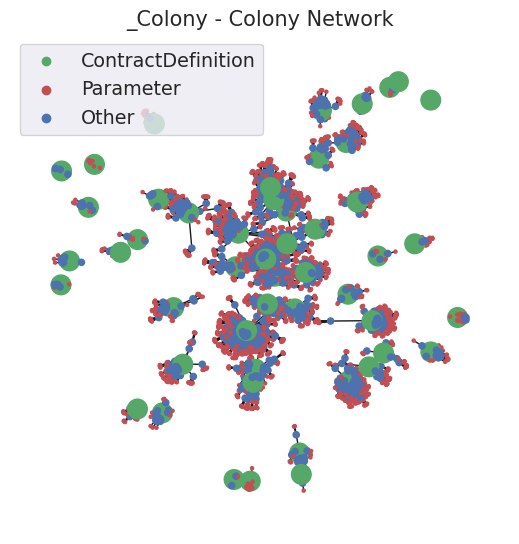

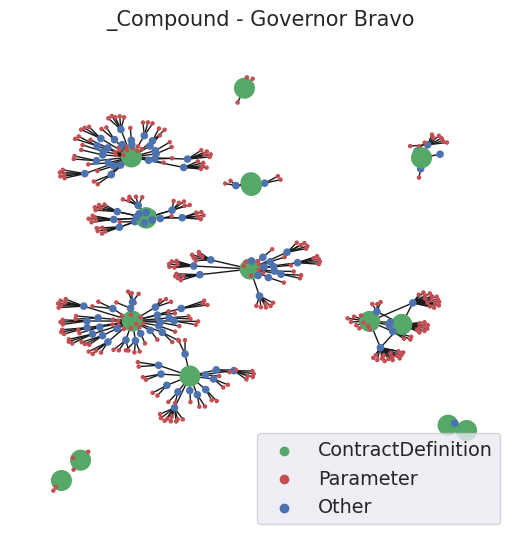

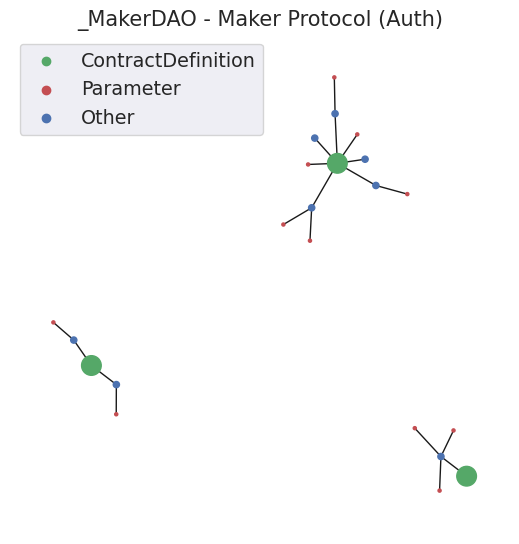

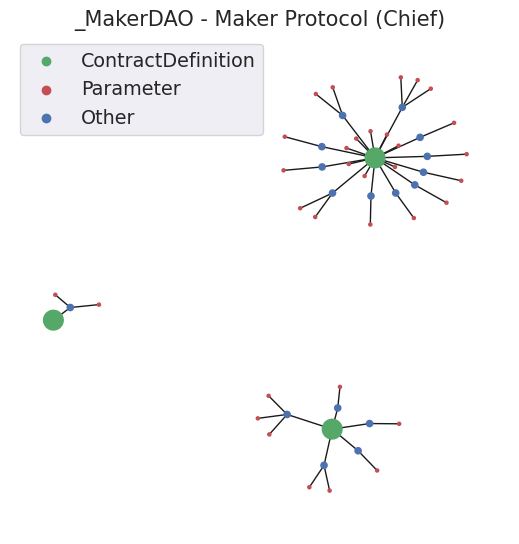

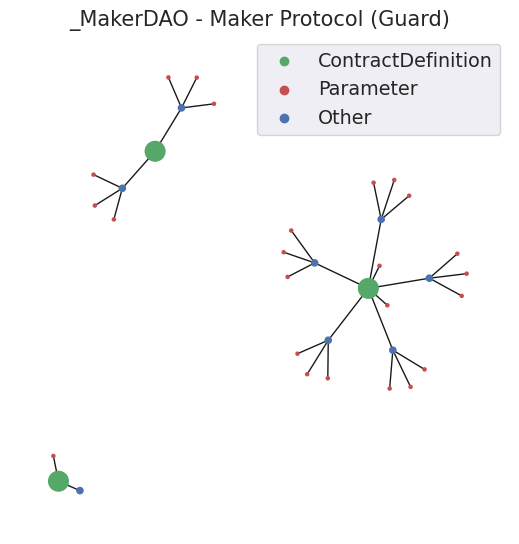

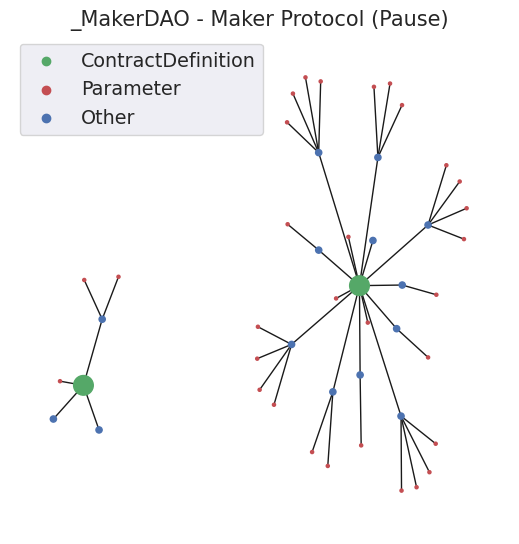

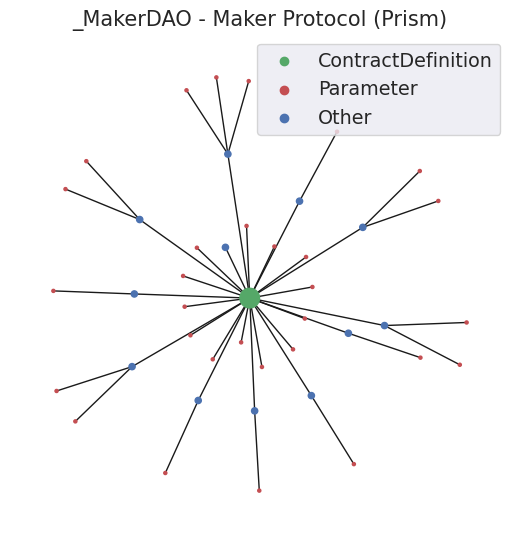

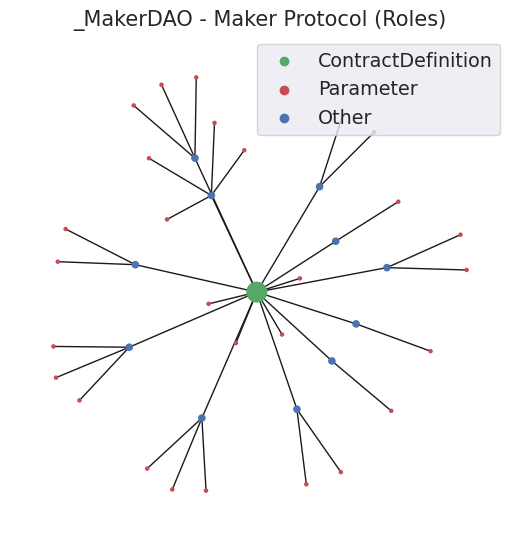

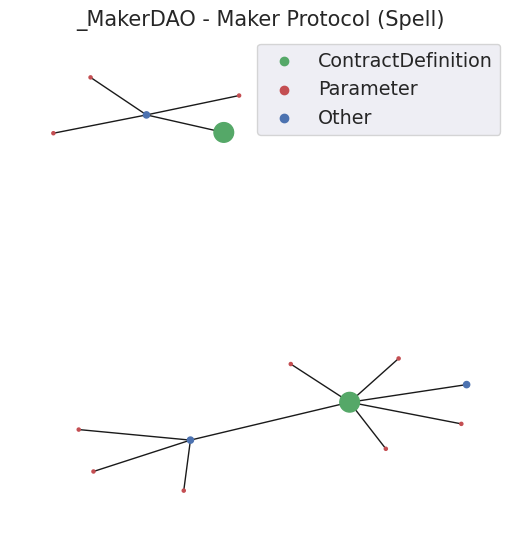

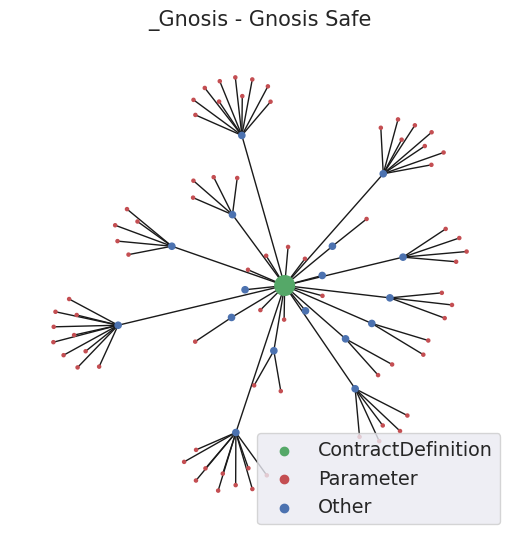

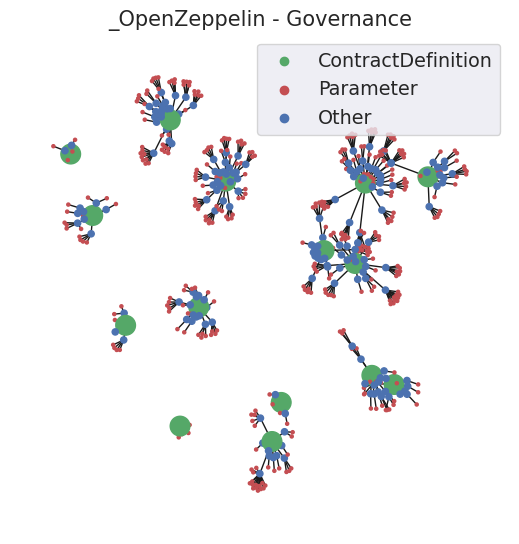

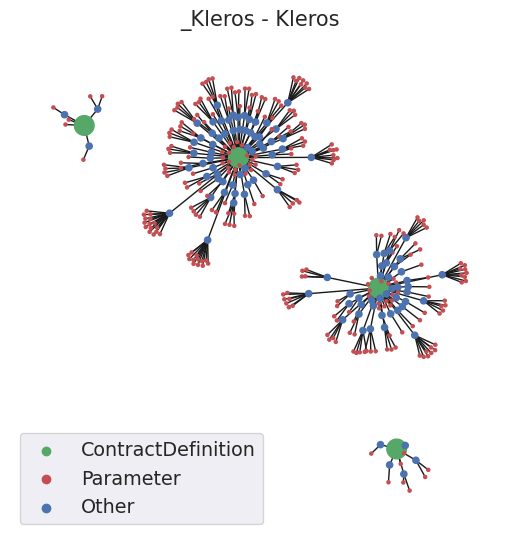

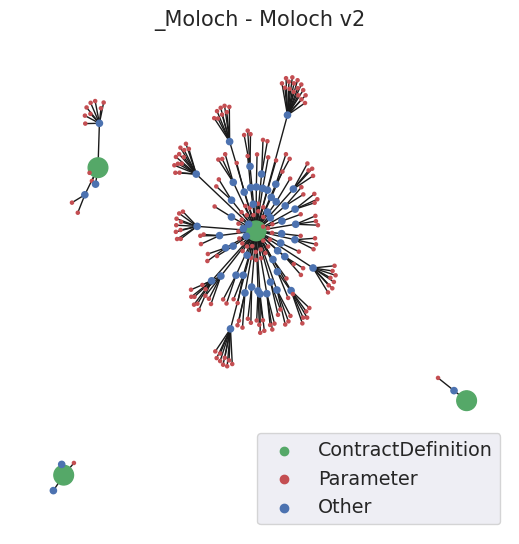

In [19]:
import networkx as nx

# TODO: show only functions, or or at least not modifiers or events
# TODO: figure out why some contracts don't show up as such
# TODO: add directional inheritance relationships

for project in df_objects['project'].unique():
    # Define the nodes
    df_o = df_objects[df_objects['project'] == project][['object_name', 'contract', 'type', 'visibility', 'inheritance', 'coding_keyword_search']].rename(columns={'object_name': 'name'})
    df_p = df_params[df_params['project'] == project][['parameter_name', 'object_id']].rename(columns={'parameter_name': 'name'})

    # Define the edges
    df_c = df_o[df_o['type'] != 'ContractDefinition']['contract'].reset_index().set_index('contract').rename(columns={'id': 'from'})
    df_c = df_c.join(df_o[df_o['type'] == 'ContractDefinition'].reset_index().set_index('contract')).rename(columns={'id': 'to'})
    df_edges = df_p['object_id'].reset_index().rename(columns={'object_id': 'from', 'id': 'to'})
    df_edges = pd.concat([df_edges, df_c])

    G = nx.from_pandas_edgelist(df_edges, source='from', target='to')
    
    # Label the node attributes
    df_nodes = pd.concat([df_o, df_p])
    df_nodes['type'] = df_nodes['type'].apply(lambda x: x if not pd.isna(x) else 'Parameter')
    nx.set_node_attributes(G, pd.Series(df_nodes.name).to_dict(), 'name')
    nx.set_node_attributes(G, pd.Series(df_nodes.type).to_dict(), 'type')

    # Set node formats based on attributes
    color_dict = {'ContractDefinition': 'g', 'Parameter': 'r', 'Other': 'b'}
    size_dict = {'ContractDefinition': 200, 'Parameter': 5, 'Other': 20}
    colors = [color_dict.get(x[1], color_dict['Other']) for x in G.nodes.data('type')]
    sizes = [size_dict.get(x[1], size_dict['Other']) for x in G.nodes.data('type')]
    
    # Draw
    plt.figure()
    nx.draw(G, node_color=colors, node_size=sizes)
    ax = plt.gca()
    ax.set_title(project)

    # A hack to get color labels to show up
    for k, v in color_dict.items():
        plt.scatter([],[], c=v, label=k)
    plt.legend()
    
    